## Import Packages

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## (a) Convert the RGB color space to YIQ
show the image histogram of Y channel.



In [2]:
output_path = "out/Y_hist.jpg"
input_path = "img/lake.jpg"

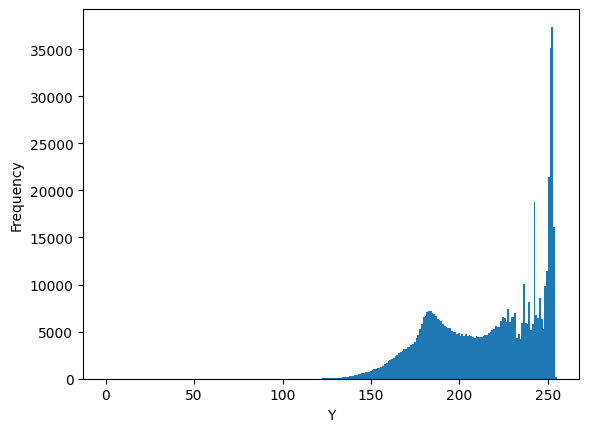

In [3]:
# Load image
img = Image.open(input_path)
img.show()

# Convert image to NumPy array
img_arr = np.array(img)

# Convert RGB to YIQ color space
yiq_arr = np.zeros_like(img_arr)
yiq_arr[:,:,0] = 0.299*img_arr[:,:,0] + 0.587*img_arr[:,:,1] + 0.114*img_arr[:,:,2]
yiq_arr[:,:,1] = 0.595879*img_arr[:,:,0] - 0.274133*img_arr[:,:,1] - 0.321746*img_arr[:,:,2]
yiq_arr[:,:,2] = 0.211205*img_arr[:,:,0] - 0.523083*img_arr[:,:,1] + 0.311878*img_arr[:,:,2]

# Plot histogram of Y channel
plt.hist(yiq_arr[:,:,0].ravel(), bins=256, range=(0,255))
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.savefig(output_path)
plt.show()



## (b) Apply gamma transform to Y channel with a suitable gamma value.

In [4]:
output_path1 = "out/gamma_img.jpg"
output_path2 = "out/Y_hist_gamma.jpg"
input_path = "img/lake.jpg"

In [11]:
# Load image
img = Image.open(input_path)

# Convert image to NumPy array
img_arr = np.array(img)

# RGB -> YIQ
yiq_from_rgb = np.array([[0.299, 0.587, 0.114],
              [0.59590059, -0.27455667, -0.32134392],
              [0.21153661, -0.52273617, 0.31119955]])
OrigShape=img_arr.shape
yiq_arr = np.dot(img_arr.reshape(-1,3), yiq_from_rgb.transpose()).reshape(OrigShape)

# Apply gamma transform to Y channel
gamma = 4
y_max = np.max(yiq_arr[:,:,0])
yiq_arr[:,:,0] = y_max * ((yiq_arr[:,:,0]/y_max) ** gamma)

## (c) Convert the transformed image from YIQ color space back to RGB to show the result with the best gamma value.
show the histogram of Y channel for the transformed iamge.

In [12]:
# YIQ -> RGB
OrigShape=yiq_arr.shape
rgb_arr = np.dot(yiq_arr.reshape(-1,3), np.linalg.inv(yiq_from_rgb).transpose()).reshape(OrigShape)

# Clip RGB values to 0-255 range and convert to uint8
rgb_arr = np.clip(rgb_arr, 0, 255).astype(np.uint8)

# Convert NumPy array to image
gamma_img = Image.fromarray(rgb_arr)

# Save the output image
gamma_img.save(output_path1)
img.show()
gamma_img.show()



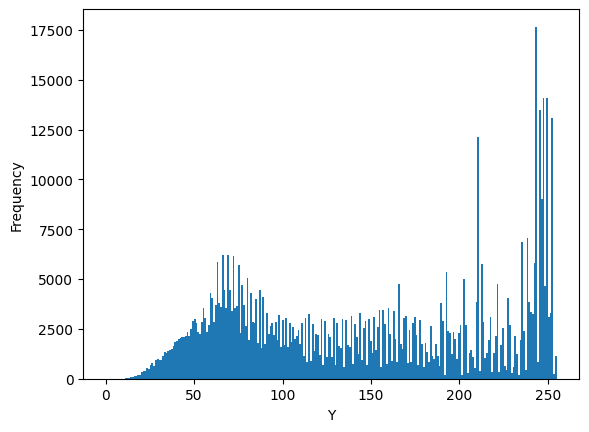

In [13]:
# Plot histogram of Y channel
plt.hist(yiq_arr[:,:,0].ravel(), bins=256, range=(0,255))
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.savefig(output_path2)
plt.show()